# 実践コンピュータビジョン
# 6章 画像のクラスタリング
## 6.2 階層クラスタリング
### 6.2.1 画像のクラスタリング
テキストp.141

階層クラスタリングに用いるクラスClusterNodeをhcluster.pyに実装する。<br>
hcluster.pyの内容については省略。

In [1]:
import numpy as np
from numpy import random
from scipy import linalg
from PIL import Image
import matplotlib.pyplot as plt
from scipy.cluster import vq
%matplotlib inline

In [2]:
import os
import hcluster

In [3]:
# 画像のリストを作成する
path = 'flickr-sunsets-small/'
imlist = [os.path.join(path,f) for f in os.listdir(path)
          if f.endswith('.jpg')]
len(imlist)

100

In [4]:
# 特徴量ベクトルを抽出する（色チャンネルに8つのビン）
features = np.zeros([len(imlist), 512])
for i,f in enumerate(imlist):
    im = np.array(Image.open(f))

    # 多次元ヒストグラム
    h,edges = np.histogramdd(im.reshape(-1,3),8,normed=True,
                        range=[(0,255),(0,255),(0,255)])
    features[i] = h.flatten()

In [5]:
# 階層クラスタリングを行う
tree = hcluster.hcluster(features)

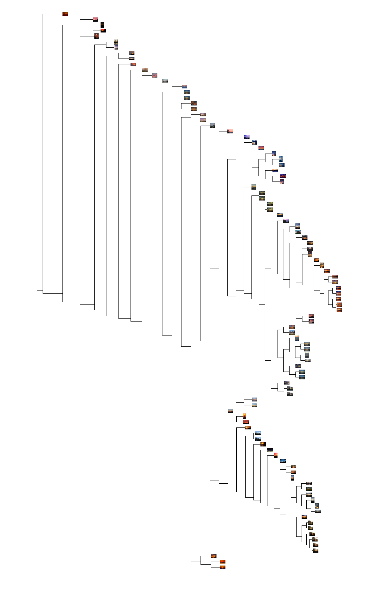

In [6]:
# 階層クラスタを示す系統図を表示する
hcluster.draw_dendrogram(tree,imlist,filename='sunset_dendrogram.jpg')

In [7]:
# 任意の閾値についてクラスタを可視化する
clusters = tree.extract_clusters(0.23*tree.distance)
len(clusters)

79

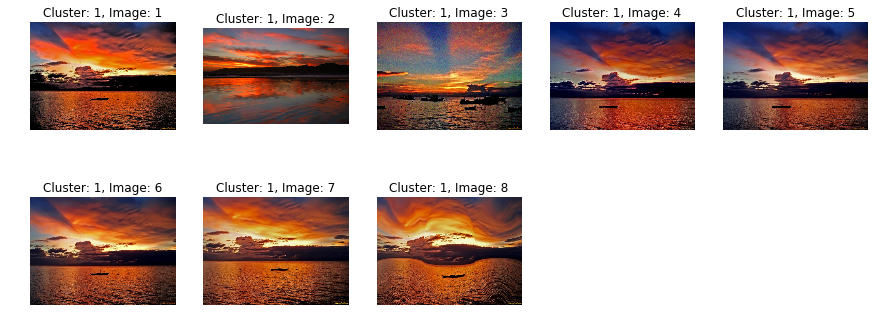

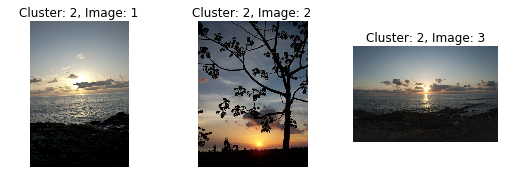

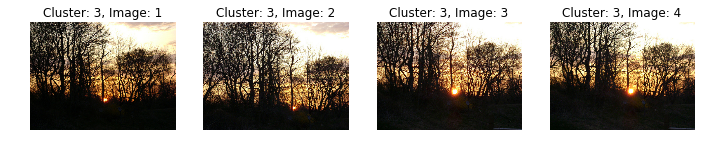

In [8]:
# 3要素以上のクラスタの画像を描画する
i = 0
nbr_e_list = []
for c in clusters:
    elements = c.get_cluster_elements()
    nbr_elements = len(elements)
    nbr_e_list.append(nbr_elements)
    if nbr_elements>2:
        plt.figure(figsize=(15,12))
        for p in range(np.minimum(nbr_elements,20)):
            plt.subplot(4,5,p+1)
            im = np.array(Image.open(imlist[elements[p]]))
            plt.imshow(im)
            tname = 'Cluster: '+ str(i+1) + ', Image: ' + str( p + 1) 
            plt.title(tname)
            plt.axis('off')
        i+=1
plt.show()